# Normalization Types
- Min Max Scaling (Most Common)
- Min Normalization
- Max Absolute
- Robust Scalaing

# Min Max Scaling

### Formula 
(Value - Minimum Vale) divide by (Maximum Value - Minimum Value)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [60]:
wine = pd.read_csv('wine_data.csv')
wine

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
wine = wine.iloc[: , 0:3]

In [6]:
wine.columns = ['Class label' , 'Alcohol' , 'Malic Acid']

In [8]:
wine.shape

(177, 3)

In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class label  177 non-null    int64  
 1   Alcohol      177 non-null    float64
 2   Malic Acid   177 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


In [10]:
wine.describe()

,Class label,Alcohol,Malic Acid
count,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887
std,0.773991,0.808808,1.119314
min,1.000000,11.030000,0.740000
25%,1.000000,12.360000,1.600000
50%,2.000000,13.050000,1.870000
75%,3.000000,13.670000,3.100000
max,3.000000,14.830000,5.800000


In [11]:
wine.corr()

,Class label,Alcohol,Malic Acid
Class label,1.000000,-0.321238,0.436127
Alcohol,-0.321238,1.000000,0.099963
Malic Acid,0.436127,0.099963,1.000000


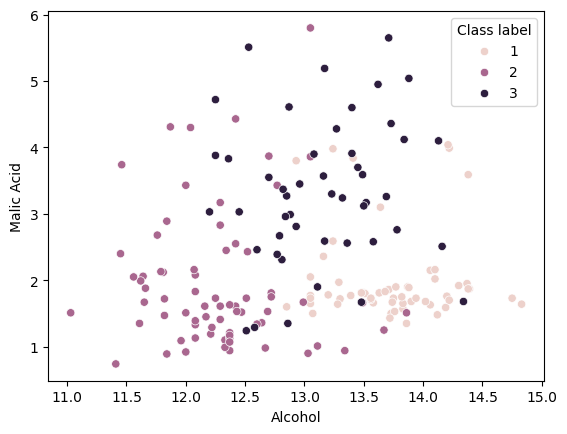

In [13]:
sns.scatterplot(data = wine , x = 'Alcohol' , y = 'Malic Acid' , hue = 'Class label')
plt.show()

<Axes: xlabel='Alcohol', ylabel='Density'>

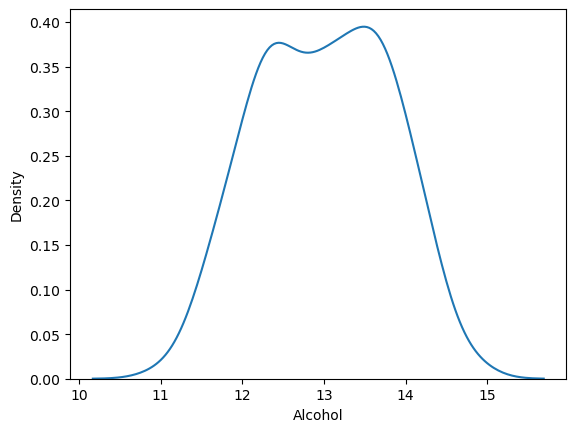

In [14]:
sns.kdeplot(data = wine , x='Alcohol')

<Axes: xlabel='Malic Acid', ylabel='Density'>

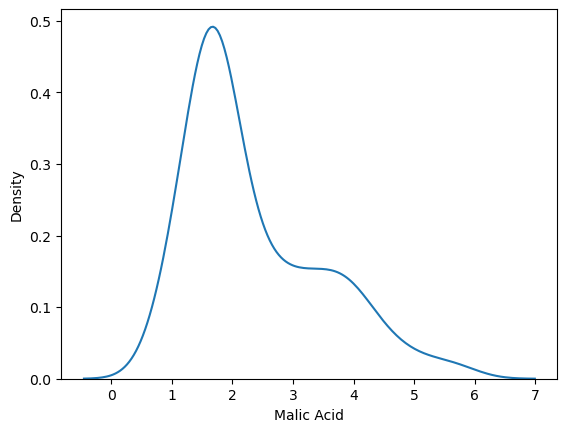

In [15]:
sns.kdeplot(data = wine , x='Malic Acid')

<Axes: xlabel='Class label', ylabel='Density'>

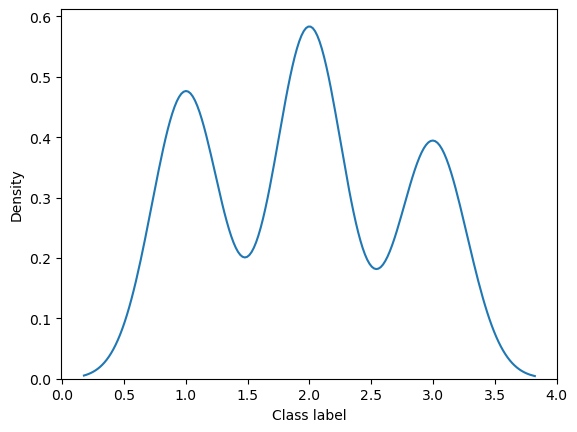

In [16]:
sns.kdeplot(data = wine , x= 'Class label')

In [17]:
from sklearn.model_selection import train_test_split

In [21]:
x_train , x_test , y_train,y_test = train_test_split(wine.drop('Class label' , axis = 1) , wine['Class label'] , test_size = 0.2 , random_state=0)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
scaler.fit(x_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [26]:
xs_train = scaler.transform(x_train)
xs_test = scaler.transform(x_test)
xs_train

array([[0.71505376, 0.48268839],
       [0.33870968, 0.39511202],
       [0.38709677, 0.12830957],
       [0.63709677, 0.61507128],
       [0.54301075, 0.23625255],
       [0.68548387, 0.15682281],
       [0.15860215, 0.22403259],
       [0.35215054, 0.31771894],
       [0.28225806, 0.10183299],
       [0.81451613, 0.15071283],
       [0.42204301, 0.3197556 ],
       [0.16935484, 0.20162933],
       [0.32795699, 0.6089613 ],
       [0.75268817, 0.13849287],
       [0.47849462, 0.2892057 ],
       [0.66129032, 0.54989817],
       [0.63978495, 0.60081466],
       [0.88978495, 0.16089613],
       [0.48924731, 0.14460285],
       [0.15591398, 0.09368635],
       [0.60215054, 0.6904277 ],
       [0.57258065, 0.54582485],
       [0.66129032, 0.15682281],
       [0.48924731, 0.48472505],
       [0.66935484, 0.46435845],
       [0.76344086, 0.20570265],
       [0.21774194, 0.        ],
       [0.32795699, 0.78004073],
       [0.36021505, 0.03665988],
       [0.26075269, 0.51731161],
       [0.

In [32]:
x_train_scaled = pd.DataFrame(xs_train , columns = x_train.columns)
x_test_scaled = pd.DataFrame(xs_test , columns = x_test.columns)

In [35]:
np.round(x_train_scaled.describe() , 1)

,Alcohol,Malic Acid
count,141.0,141.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.1
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


Text(0.5, 1.0, 'Before Scaling')

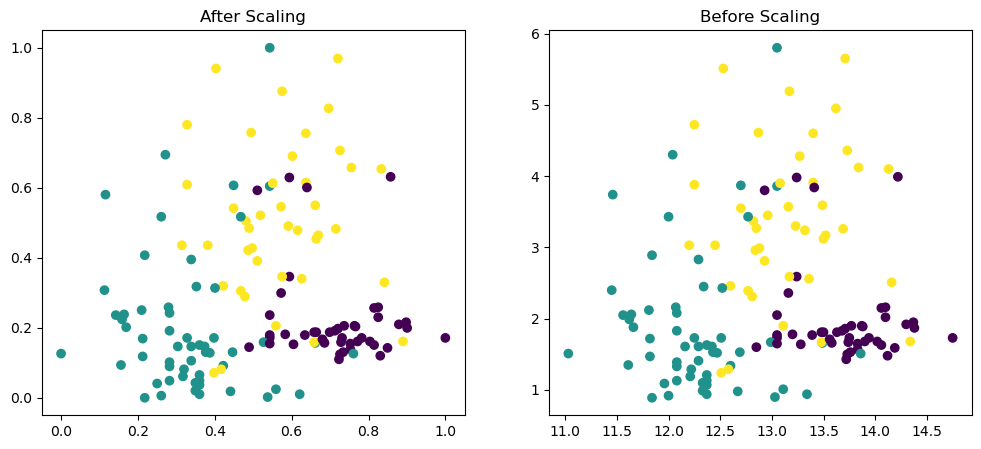

In [45]:
fig ,[ax1 , ax2] = plt.subplots(ncols= 2 , figsize=(12, 5))

ax1.scatter(data= x_train_scaled , x = 'Alcohol'  , y = 'Malic Acid' , c=y_train)
ax1.set_title("After Scaling")

ax2.scatter(data= x_train , x = 'Alcohol' , y='Malic Acid' , c=y_train)
ax2.set_title("Before Scaling")



Text(0.5, 1.0, 'After Scaling')

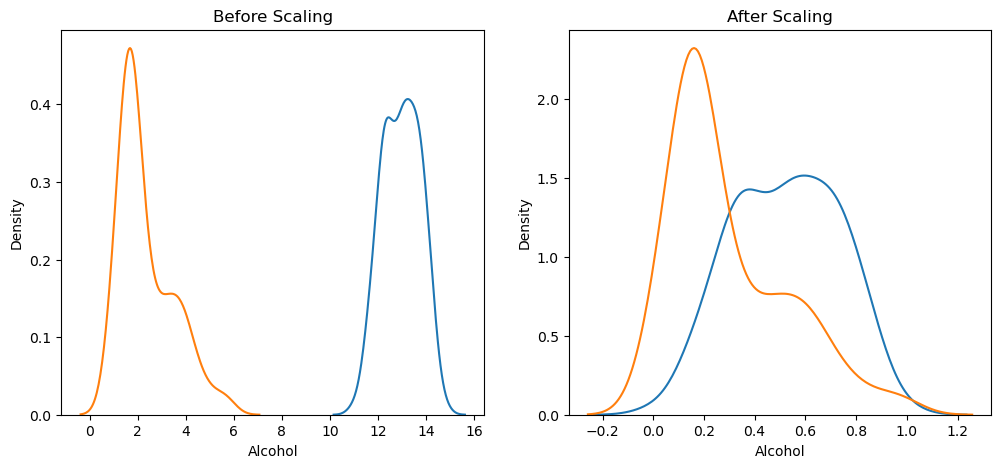

In [52]:
fig, (ax1 , ax2 ) = plt.subplots(ncols = 2 , figsize =(12, 5))
sns.kdeplot(data= x_train , x ='Alcohol' , ax = ax1)
sns.kdeplot(data=x_train , x='Malic Acid' , ax=ax1)
ax1.set_title("Before Scaling")

sns.kdeplot(data = x_train_scaled , x='Alcohol' , ax= ax2)
sns.kdeplot(data = x_train_scaled , x='Malic Acid' , ax=ax2)
ax2.set_title('After Scaling')

Text(0.5, 1.0, 'Malic Acid After Scaling')

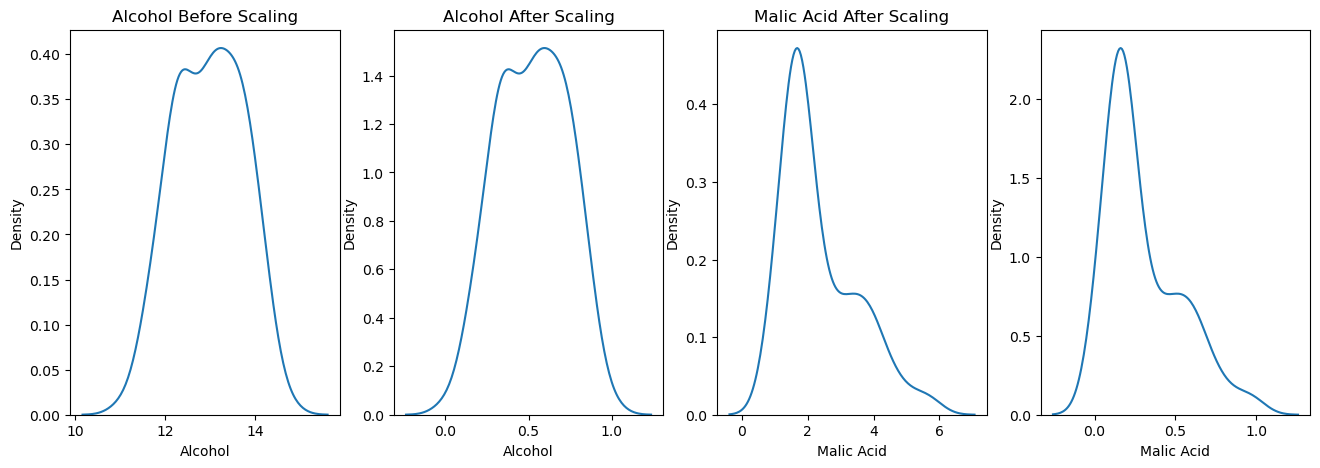

In [56]:
fig ,(ax1 , ax2, ax3,ax4 ) = plt.subplots(ncols = 4 , figsize = (16,5))
sns.kdeplot(data = x_train , x='Alcohol' , ax=ax1)
ax1.set_title("Alcohol Before Scaling")
sns.kdeplot(data = x_train_scaled , x='Alcohol' , ax=ax2)
ax2.set_title("Alcohol After Scaling")
sns.kdeplot(data = x_train , x= 'Malic Acid' , ax=ax3)
ax3.set_title("Malic Acid Before Scaling")
sns.kdeplot(data = x_train_scaled ,x= 'Malic Acid' , ax=ax4)
ax3.set_title("Malic Acid After Scaling")

In [58]:
from sklearn.preprocessing import MaxAbsScaler

In [62]:
from sklearn.preprocessing import RobustScaler